# Signal to Noise Ratio (SNR)

Generally, the signal to noise ratio is defined as

$$
\text{SNR} = \frac{S}{\sigma_{\rm Noise}}.
$$

For the generated images, it is tricky to define the signal $S$ in a sensible way, as the mean intensity and the shape varies significantly with the depth of the individual particles.

Therefore, each depth essentially has its own SNR at a given noise power.
We define $S(z)$ as a weighted average of the deviation from the background, i.e.

$$
S(z) = \frac{
    \sum_{x,y} \left| I_{x,y}(z) - I_{\text{bg}} \right| \cdot \left( I_{x,y}(z) - I_{\text{bg}} \right)^2
}{
    \sum_{x,y} \left( I_{x,y}(z) - I_{\text{bg}} \right)^2
}
$$

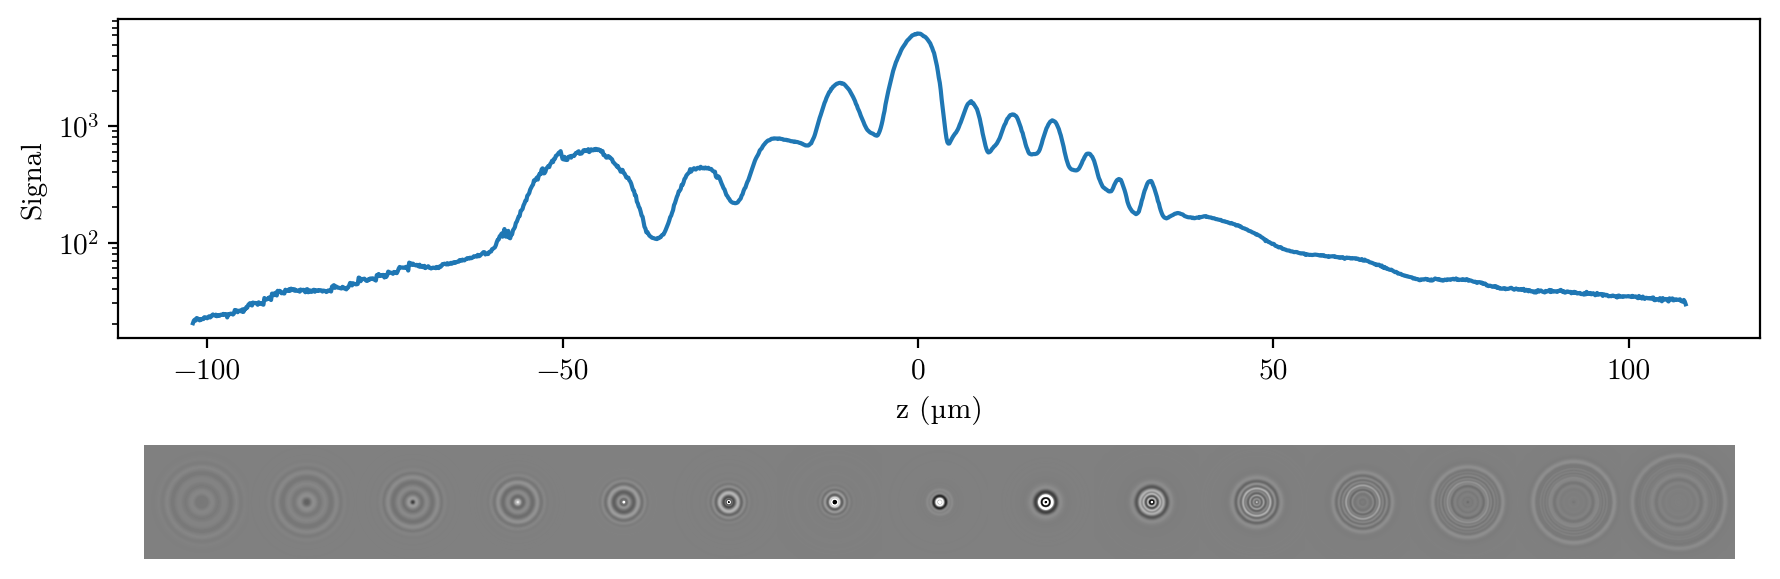

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def place_images(ax, images, xmin=0.05,xmax=0.95, vmin=None, vmax=None):
    x_range = np.linspace(xmin, xmax, len(z))
    for x, image in zip(x_range, images):
        im = OffsetImage(image, zoom=0.32, cmap="gray")
        if vmin is not None and vmax is not None:
            im.get_children()[0].set_clim(vmin, vmax)
        ab = AnnotationBbox(im, (x, 0), xycoords="axes fraction", frameon=False, pad=0, box_alignment=(0.5, 0))
        ax.add_artist(ab)


refstack = np.load("downsampled_radial_averaged_refstack.npy")
eps=1e-6
weight = (refstack-2e4+eps)**2
refstack_signal = np.sum(np.abs(refstack-2e4)*weight, axis=(1,2))/np.sum(weight, axis=(1,2))
z_space = np.linspace(-102, 108, refstack.shape[0])

fig, ax = plt.subplots(2,1, height_ratios=(0.95,0.05), figsize=(9, 3))
ax[0].plot(z_space,refstack_signal)
ax[0].set_yscale("log")
ax[0].set_xlabel("z (µm)")
ax[0].set_ylabel("Signal")

ax[1].axis("off")
z = np.linspace(0,1567, 15).astype(int)
place_images(ax[1], refstack[z], vmin=1.95e4, vmax=2.05e4)
plt.tight_layout()
plt.show()

At typical noise scales $\sigma \approx 50$, this yields:

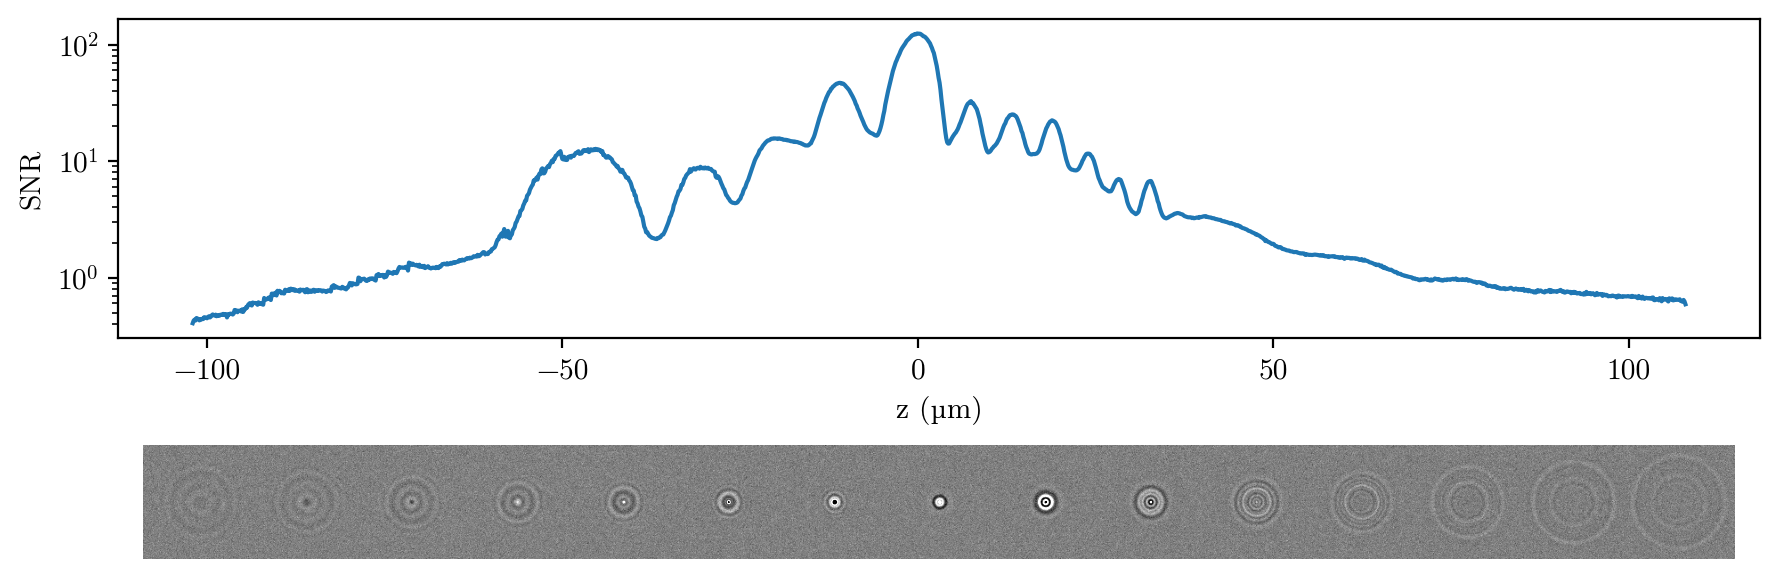

In [23]:
fig, ax = plt.subplots(2,1, height_ratios=(0.95,0.05), figsize=(9, 3))
ax[0].plot(z_space,refstack_signal/50)
ax[0].set_yscale("log")
ax[0].set_xlabel("z (µm)")
ax[0].set_ylabel("SNR")

ax[1].axis("off")
z = np.linspace(0,1567, 15).astype(int)
images = refstack[z]
place_images(ax[1], images+np.random.normal(0,50, images.shape), vmin=1.95e4, vmax=2.05e4)
plt.tight_layout()
plt.show()